In [1]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io
# Get uploaded file name
filename = next(iter(uploaded))
# Read it
df = pd.read_csv(io.BytesIO(uploaded[filename]))
# Check
print(f"Shape: {df.shape}")
df.head()

Saving amazon_prime_titles.csv to amazon_prime_titles.csv
Shape: (9668, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


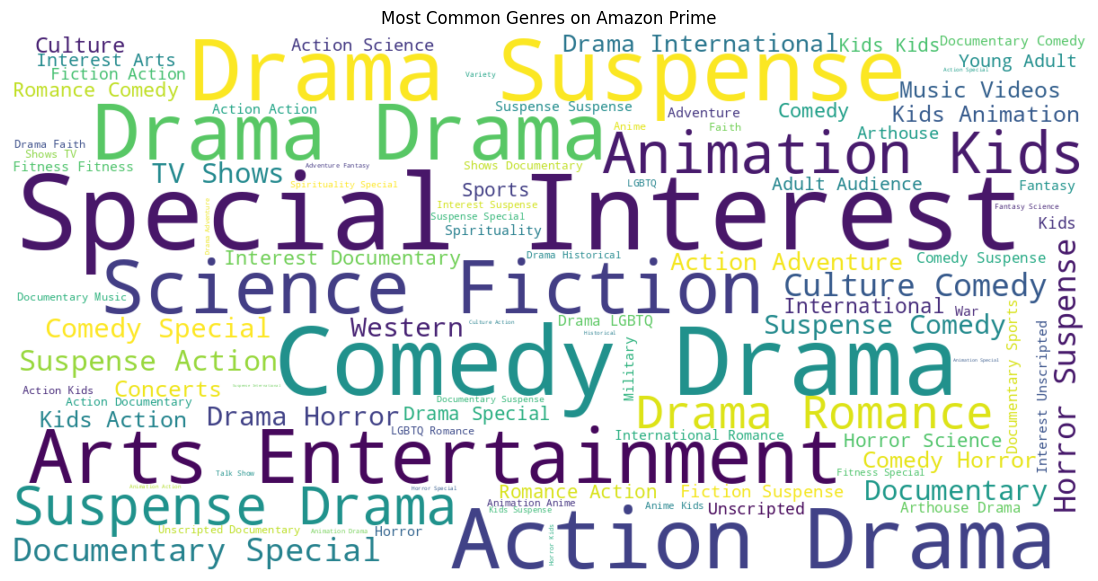

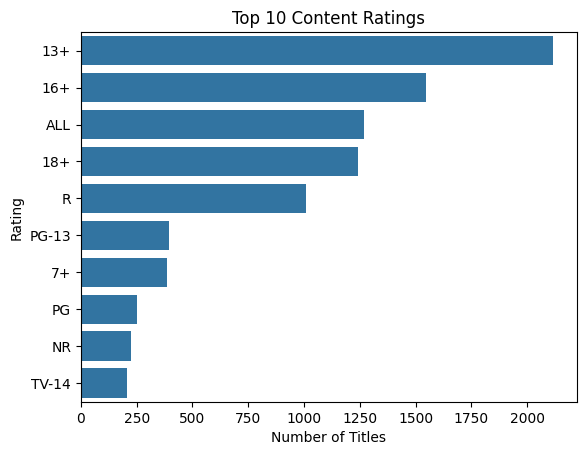

✅ Saved: movies_vs_tv.png


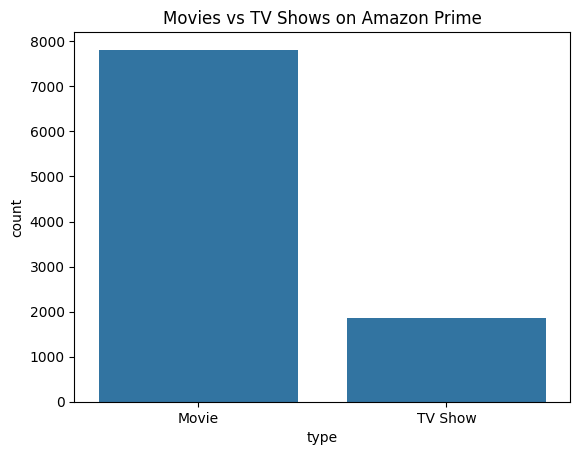

In [2]:
# ========================================
# ✅ PART 2: Advanced Visuals & Save
# ========================================

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# ------------------------------
# 1️⃣ Genre Word Cloud
# ------------------------------
text = ' '.join(df['listed_in'].dropna())

wordcloud = WordCloud(width=1200, height=600, stopwords=STOPWORDS, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Genres on Amazon Prime')
plt.show()

# ------------------------------
# 2️⃣ Top 10 Content Ratings
# ------------------------------
top_ratings = df['rating'].value_counts().head(10)
sns.barplot(y=top_ratings.index, x=top_ratings.values)
plt.title('Top 10 Content Ratings')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.show()

# ------------------------------
# 3️⃣ Save Example Chart
# ------------------------------
fig = plt.figure()
sns.countplot(data=df, x='type')
plt.title('Movies vs TV Shows on Amazon Prime')
fig.savefig('movies_vs_tv.png')

print('✅ Saved: movies_vs_tv.png')